Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising/digital marketing that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users' demographic information and target their ads appropriately.

Social media targeting combines current targeting options (such as geotargeting, behavioral targeting, socio-psychographic targeting, etc.), to make detailed target group identification possible. With social media targeting, advertisements are distributed to users based on information gathered from target group profiles.

Social network advertising is not necessarily the same as social media targeting. Social media targeting is a method of optimizing social media advertising by using profile data to deliver advertisements directly to individual users. Social network advertising refers to the process of matching social network users to target groups that have been specified by the advertiser. Social media advertising involves creating content on social media platforms, engaging with followers, and running social media advertisements.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Social_network_advertising)

For this assignment, we will take a look at how Social Network pick who to advertise using k-Nearest Neighbor algorithm. We will leverage the [Social Network Ads dataset](https://www.kaggle.com/rakeshrau/social-network-ads).

First, let's import the data

# Learning Objectives
- Define basic terminology of machine learning.
- Describe a typical machine learning modeling process.
- Demonstrate the ability to use K-Nearest Neighbor algorithm.
- Demonstrate the ability to tweak K-Nearest Neighbor algorithm.
- Demonstrate the ability to determine the accuracy of a model.

JORDAN PRUETT
Assignment 1

In [1]:
import numpy as np
import pandas as pd

SNA = pd.read_csv('./Social_Network_Ads.csv')

Question 1: Print the top 10 rows of the dataset

In [2]:
print(SNA.iloc[:10])

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


Question 1.2: Drop the User Id column from the SNA dataframe using [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method

In [3]:
SNA_edited = SNA.drop(['User ID'], axis=1)

Question 2.1: Within the Gender column, replace the text Male and Female with 0 and 1 respectively. You can use [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method.

In [4]:
SNA_edited = SNA_edited.replace({'Male': 0, 'Female': 1})

Question 2.2: Check if successful by printing top 10 rows

In [5]:
print(SNA_edited.iloc[:10])

   Gender  Age  EstimatedSalary  Purchased
0       0   19            19000          0
1       0   35            20000          0
2       1   26            43000          0
3       1   27            57000          0
4       0   19            76000          0
5       0   27            58000          0
6       1   27            84000          0
7       1   32           150000          1
8       0   25            33000          0
9       1   35            65000          0


As part of any machine learning problem, we need to explore the data and perform exploratory data analysis. For the next set of questions, we will be using [seaborn](https://seaborn.pydata.org/index.html) library for visualization.

Question 3.1: Using Seaboard [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), create three pairwise scatter plots using Purchased column as hue for the following pairs:
1. Age & EstimatedSalary
2. Age & Gender
3. Gender & EstimatedSalary

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

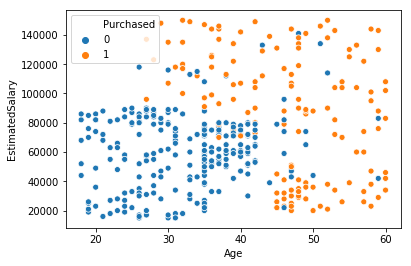

In [7]:
sns.scatterplot(data=SNA_edited, x="Age", y="EstimatedSalary", hue="Purchased")

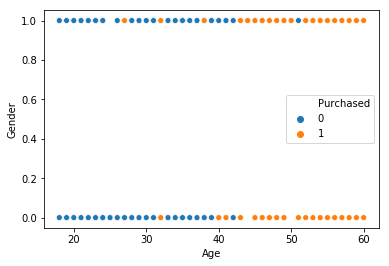

In [8]:
sns.scatterplot(data=SNA_edited, x="Age", y="Gender", hue="Purchased")

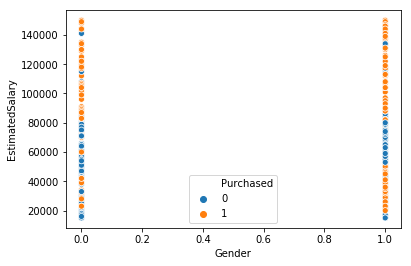

In [9]:
sns.scatterplot(data=SNA_edited, x="Gender", y="EstimatedSalary", hue="Purchased")

Question 3.2: Based on the above plots, which feature(s) can be best used to determine if a person will purchase an item based on Ad? 

Based on the plots above, Age & EstimatedSalary seem like the best features for predicting "purchased." The two categories are pretty neatly separable in that plot, which often means they will be easy to classify accurately.

Question 3.3: Use histogram plots to validate your answer. Set the Hue to be 'Purchased'

In [10]:
#sns.histplot(data=SNA_edited, x="Gender", y="EstimatedSalary", hue="Purchased")

Question 4: Now that we have performed data exploration, lets experiment with k-NN algorithm. But first, we need to split the data into training and testing set. To perform this task, you can use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a 70/30 split for training and test data respectively.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(SNA_edited[['Gender', 'Age', 'EstimatedSalary']],
                                                    SNA_edited['Purchased'],
                                                    test_size=.3,
                                                    random_state=99
)

Question 5.1: Using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), write a k-NN classifier with n=2

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

Using [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), evaluate and print the classifier output

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def print_metrics(y_true, y_pred):
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred), '\n')

    print('Confusion Matrix:')
    print(confusion_matrix(y_true, y_pred), '\n')

    print('Accuracy Score:')
    print(accuracy_score(y_true, y_pred), '\n')
    
print_metrics(y_test, predictions)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86        83
           1       0.74      0.54      0.62        37

    accuracy                           0.80       120
   macro avg       0.78      0.73      0.74       120
weighted avg       0.79      0.80      0.79       120
 

Confusion Matrix:
[[76  7]
 [17 20]] 

Accuracy Score:
0.8 



Question 5.2: What happens when you increase the value of k from 2 to 10. Iterate over k from 2 to 10, build and evaluate the different KNeighborsClassifier

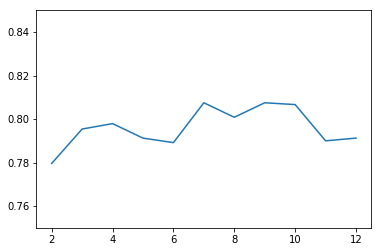

In [17]:
def test_various_k(X, y, max_k=10, step=1, trials=20, metric='minkowski'):
    
    accuracies = []
    n_range = [n for n in range(2, max_k+1, step)]
    for n in n_range:

        avg_acc = 0
        for _ in range(trials): # results vary a lot based on test split, so we'll average over 20 trials for each K
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
            knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
            knn.fit(X_train, y_train)
            predictions = knn.predict(X_test)
            avg_acc += accuracy_score(y_test, predictions)

        avg_acc /= trials
        accuracies.append(avg_acc)
    return n_range, accuracies

n_range, accuracies = test_various_k(SNA_edited[['Gender', 'Age', 'EstimatedSalary']],
                                     SNA_edited['Purchased'],
                                     max_k=12, 
                                     step=1, 
                                     trials=20)
plt.plot(n_range, accuracies)
plt.ylim(bottom=.75, top=.85)
plt.show()

Question 5.3: What happened to the accuracy of the classifier at k>9 and why?

The accuracy seems to decrease due to overfitting at about K=9. However, it's also worth noting that there is a fair bit of variation in this result depending on the makeup of the train-test-split. I averaged over 100 trials for each K in order to smooth this randomness somewhat, but even with that many trials, there was still a bit of variation.

Question 6.1: Now try eliminating one of the features (Eender) from the dataset

In [18]:
X_no_gender = SNA_edited[['Age', 'EstimatedSalary']]

Question 6.2: Perform the same task from question 5.2 with the updated data

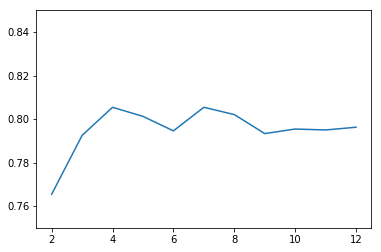

In [20]:
n_range, accuracies = test_various_k(X_no_gender,
                                     SNA_edited['Purchased'],
                                     max_k=12, 
                                     step=1, 
                                     trials=20)
plt.plot(n_range, accuracies)
plt.ylim(bottom=.75, top=.85)
plt.show()

Question 6.3: What happened to the results? What's your conclusion? Plot accuracy vs k.

Removing the gender variable had almost no discernible effect on the accuracy. This seems to confirm the earlier answer that Age and EstimatedSalary are the two most predictive features, and that Gender is less predictive, or perhaps even not predictive at all.

Question 7: Repeat steps 6.1-6.3 with another distance metric. Comment on what happens to the results?

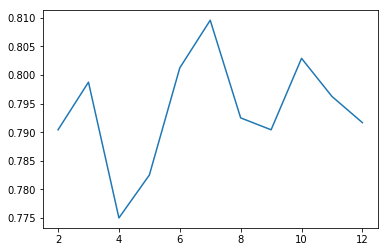

In [24]:
n_range, scores = test_various_k(
                                SNA_edited[['Age', 'EstimatedSalary']],
                                SNA_edited['Purchased'],
                                max_k=12, 
                                step=1, 
                                trials=20,
                                metric='manhattan'
)
plt.plot(n_range, scores)
plt.show()

When using Manhattan distance and removing Gender, the accuracy curve is more "jumpy," with bigger gaps in accuracy between the chosen values of K. The accuracy seems to degrade after about K=8.